<a href="https://colab.research.google.com/github/shalwin04/Song-Recommendation/blob/main/Song_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Songs recommendation based on the sentiment scores**


import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIML Proj/Datasets/muse_v3.csv")

In [ ]:
df

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
...,...,...,...,...,...,...,...,...,...,...,...
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN


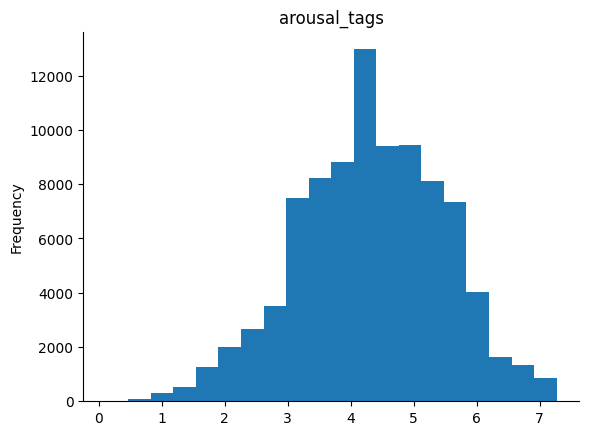

In [ ]:
# @title arousal_tags

from matplotlib import pyplot as plt
df['arousal_tags'].plot(kind='hist', bins=20, title='arousal_tags')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
valence_threshold = 5.0

# Create a new column 'recommended_song' based on the valence score
df['recommended_song'] = df['valence_tags'].apply(lambda x: 1 if x >= valence_threshold else 0)

features = ['valence_tags','arousal_tags','dominance_tags']
X = df[features]
y = df['recommended_song']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

       valence_tags  arousal_tags  dominance_tags
11453      3.150000      3.320000        3.150000
9691       3.590476      3.611905        3.539524
51994      7.508571      5.025000        6.518571
23531      4.753333      2.896667        5.113333
30635      5.900000      4.770000        5.960000
...             ...           ...             ...
6265       4.635000      4.320000        4.120000
54886      3.850000      5.640000        4.600000
76820      5.100000      4.090000        6.440000
860        3.080000      5.870000        5.490000
15795      3.558261      2.764783        3.805652

[72000 rows x 3 columns]
11453    0
9691     0
51994    1
23531    0
30635    1
        ..
6265     0
54886    0
76820    1
860      0
15795    0
Name: recommended_song, Length: 72000, dtype: int64


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Assuming you have loaded and trained a RandomForestClassifier as 'model'

# Preprocess the input data (e.g., sentiment scores)
input_sentiment_score = [[5.0, 3.0, 4.0]]  # Example sentiment score

# Predict the output
predicted_song = model.predict(input_sentiment_score)

# Interpret the output
if predicted_song == 1:
    print("Recommended Song")
else:
    print("Not Recommended Song")


Recommended Song


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Predict the output
predicted_song = model.predict(input_sentiment_score)

# Interpret the output
if predicted_song == 1:
    recommended_song = recommend_song(input_sentiment_score)  # Implement this function to recommend a song based on sentiment scores
    print("Recommended Song:", recommended_song)
else:
    print("Not Recommended Song")


In [ ]:
def recommend_song(valence_tags, arousal_tags, dominance_tags):
    # Example logic to recommend a song based on valence, arousal, and dominance tags
    if 'happy' in valence_tags and 'high energy' in arousal_tags:
        return "Happy Upbeat Song"
    elif 'sad' in valence_tags and 'low energy' in arousal_tags:
        return "Sad Melancholic Song"
    elif 'aggressive' in dominance_tags:
        return "Aggressive Rock Song"
    else:
        return "Generic Recommendation"

# Example usage
valence_tags = ['happy']
arousal_tags = ['high energy']
dominance_tags = ['aggressive']

recommended_song = recommend_song(valence_tags, arousal_tags, dominance_tags)
print("Recommended Song:", recommended_song)


Recommended Song: Happy Upbeat Song


In [ ]:
def recommend_song(input_sentiment_score, muSe_data):
    valence_score, arousal_score, dominance_score = input_sentiment_score

    # Define threshold values for sentiment scores
    valence_threshold = 5.0
    arousal_threshold = 5.0
    dominance_threshold = 5.0

    # Determine valence tags
    valence_tags = []
    if valence_score >= valence_threshold:
        valence_tags.append('happy')
    elif valence_score <= -valence_threshold:
        valence_tags.append('sad')

    # Determine arousal tags
    arousal_tags = []
    if arousal_score >= arousal_threshold:
        arousal_tags.append('high energy')
    elif arousal_score <= -arousal_threshold:
        arousal_tags.append('low energy')

    # Determine dominance tags
    dominance_tags = []
    if dominance_score >= dominance_threshold:
        dominance_tags.append('aggressive')

    # # Recommend song based on tags
    # if 'happy' in valence_tags and 'high energy' in arousal_tags:
    #     return "Happy Upbeat Song"
    # elif 'sad' in valence_tags and 'low energy' in arousal_tags:
    #     return "Sad Melancholic Song"
    # elif 'aggressive' in dominance_tags:
    #     return "Aggressive Rock Song"
    # else:
    #     return "Generic Recommendation"

    filtered_data = muSe_data[
        (muSe_data['valence_tags'] == valence_score) &
        (muSe_data['arousal_tags'] == arousal_score) &
        (muSe_data['dominance_tags'] == dominance_score)
    ]

    # Check if any songs match the sentiment scores
    if not filtered_data.empty:
        # Return the first song from the filtered dataset
        return filtered_data.iloc[0]['track']
    else:
        return "No Song Found"

# Example usage
input_sentiment_score = [5.0, 3.0, 4.0]  # Example sentiment score
recommended_song = recommend_song(input_sentiment_score, df)
print("Recommended Song:", recommended_song)

# # Example usage
# input_sentiment_score = [5.0, 3.0, 4.0]  # Example sentiment score
# recommended_song = recommend_song(input_sentiment_score)
# print("Recommended Song:", recommended_song)


Recommended Song: No Song Found


In [ ]:
def recommend_song(input_sentiment_score, muSe_data):
    valence_score, arousal_score, dominance_score = input_sentiment_score

    # Define threshold values for sentiment scores
    valence_threshold = 5.0
    arousal_threshold = 5.0
    dominance_threshold = 5.0

    # Filter the dataset based on sentiment scores
    filtered_data = muSe_data[
        (muSe_data['valence_tags'] == valence_score) &
        (muSe_data['arousal_tags'] == arousal_score) &
        (muSe_data['dominance_tags'] == dominance_score)
    ]

    # Check if any songs match the sentiment scores
    if not filtered_data.empty:
        # Return all matching songs
        return filtered_data['track'].tolist()
    else:
        return "No Song Found"

# Example usage
input_sentiment_score = [5.0, 3.0, 4.0]  # Example sentiment score
recommended_songs = recommend_song(input_sentiment_score,df)
if isinstance(recommended_songs, list):
    print("Recommended Songs:", recommended_songs)
else:
    print("Recommended Song:", recommended_songs)


Recommended Song: No Song Found


In [ ]:
model.feature_names_in_ = features

In [ ]:
# Example input for checking the model
input_features = [[2.0, 3.0, 4.0]]  # Example values for valence, arousal, and dominance

# Make a prediction using the trained model
predicted_song = model.predict(input_features)

# Output the predicted song
print("Predicted Song:", predicted_song)


Predicted Song: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# index of the predicted song
predicted_index = predicted_song[0]

# Retrieve the corresponding song from the dataset
predicted_song_data = df.iloc[predicted_index]

# Extract the song name
predicted_song_name = predicted_song_data['track']
print("Predicted Song:", predicted_song_name)

Predicted Song: 'Till I Collapse
